In [1]:
import numpy as np
import awkward as ak
import uproot
import src.functions as fn
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import cm

In [2]:
import mplhep as hep

# Make plots look more HEP-like
plt.style.use(hep.style.ROOT)

In [3]:
filename = "tracksters_ds_200e.root"
file = uproot.open(filename)
tracksters = file['tracksters']

In [10]:
vertices_indexes = tracksters['vertices_indexes'].array()
vertices_x = tracksters['vertices_x'].array()
vertices_y = tracksters['vertices_y'].array()
vertices_z = tracksters['vertices_z'].array()
vertices_E = tracksters['vertices_energy'].array()
trackster_label = tracksters['trackster_label'].array()

In [20]:
complete = trackster_label == 1
incomplete = trackster_label == 0

In [25]:
vertices_indexes_inc = vertices_indexes[incomplete]
vertices_x_inc = vertices_x[incomplete]
vertices_y_inc = vertices_y[incomplete]
vertices_z_inc = vertices_z[incomplete]
vertices_E_inc = vertices_E[incomplete]

vertices_indexes_com = vertices_indexes[complete]
vertices_x_com = vertices_x[complete]
vertices_y_com = vertices_y[complete]
vertices_z_com = vertices_z[complete]
vertices_E_com = vertices_E[complete]

In [38]:
tooSmall_inc = ak.num(vertices_indexes_inc,axis=-1) > 2
tooSmall_com = ak.num(vertices_indexes_com,axis=-1) > 2

In [39]:
vertices_indexes_inc_g = vertices_indexes_inc[tooSmall_inc]
vertices_x_inc_g = vertices_x_inc[tooSmall_inc]
vertices_y_inc_g = vertices_y_inc[tooSmall_inc]
vertices_z_inc_g = vertices_z_inc[tooSmall_inc]
vertices_E_inc_g = vertices_E_inc[tooSmall_inc]

vertices_indexes_com_g = vertices_indexes_com[tooSmall_com]
vertices_x_com_g = vertices_x_com[tooSmall_com]
vertices_y_com_g = vertices_y_com[tooSmall_com]
vertices_z_com_g = vertices_z_com[tooSmall_com]
vertices_E_com_g = vertices_E_com[tooSmall_com]

In [82]:
%%time

# How many to run:
# to run all available N_tr = len(vertices_indexes_inc_g)
N_tr = 10000

path1_inc = np.zeros(N_tr)
path5_inc = np.zeros(N_tr)
path1_inc_norm = np.zeros(N_tr)
path5_inc_norm = np.zeros(N_tr)
for tr in range(N_tr):
    v_ind = vertices_indexes_inc_g[tr]
    v_x = vertices_x_inc_g[tr]
    v_y = vertices_y_inc_g[tr]
    v_z = vertices_z_inc_g[tr]
    v_E = vertices_E_inc_g[tr]
    edges_1 = fn.edgeBuilderNew(
        v_ind,
        v_x, 
        v_y, 
        v_z, 
        v_E
    )
    edges_5 = fn.edgeBuilderNew(
        v_ind,
        v_x, 
        v_y, 
        v_z, 
        v_E,
        nEdg=5
    )
    edges_fl_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())
    edges_fl_5 = ak.flatten(edges_5[ak.num(edges_5) > 0].to_list())
    c_eig_1 = fn.nXCentralityEigen(v_ind,edges_fl_1)
    c_eig_5 = fn.nXCentralityEigen(v_ind,edges_fl_5)
    path1_inc[tr] = fn.longestPathSource(v_ind, edges_fl_1, c_eig_1)
    path5_inc[tr] = fn.longestPathSource(v_ind, edges_fl_5, c_eig_5)
    path1_inc_norm[tr] = fn.longestPathSource(v_ind, edges_fl_1, c_eig_1)/len(v_ind)
    path5_inc_norm[tr] = fn.longestPathSource(v_ind, edges_fl_5, c_eig_5)/len(v_ind)

CPU times: user 6min 10s, sys: 359 ms, total: 6min 10s
Wall time: 6min 10s


In [83]:
%%time

# How many to run:
# to run all available N_tr = len(vertices_indexes_com_g)
N_tr = 10000

path1_com = np.zeros(N_tr)
path5_com = np.zeros(N_tr)
path1_com_norm = np.zeros(N_tr)
path5_com_norm = np.zeros(N_tr)
for tr in range(N_tr):
    v_ind = vertices_indexes_com_g[tr]
    v_x = vertices_x_com_g[tr]
    v_y = vertices_y_com_g[tr]
    v_z = vertices_z_com_g[tr]
    v_E = vertices_E_com_g[tr]
    edges_1 = fn.edgeBuilderNew(
        v_ind,
        v_x, 
        v_y, 
        v_z, 
        v_E
    )
    edges_5 = fn.edgeBuilderNew(
        v_ind,
        v_x, 
        v_y, 
        v_z, 
        v_E,
        nEdg=5
    )
    edges_fl_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())
    edges_fl_5 = ak.flatten(edges_5[ak.num(edges_5) > 0].to_list())
    c_eig_1 = fn.nXCentralityEigen(v_ind,edges_fl_1)
    c_eig_5 = fn.nXCentralityEigen(v_ind,edges_fl_5)
    path1_com[tr] = fn.longestPathSource(v_ind, edges_fl_1, c_eig_1)
    path5_com[tr] = fn.longestPathSource(v_ind, edges_fl_5, c_eig_5)
    path1_com_norm[tr] = fn.longestPathSource(v_ind, edges_fl_1, c_eig_1)/len(v_ind)
    path5_com_norm[tr] = fn.longestPathSource(v_ind, edges_fl_5, c_eig_5)/len(v_ind)

CPU times: user 13min 38s, sys: 740 ms, total: 13min 39s
Wall time: 13min 39s


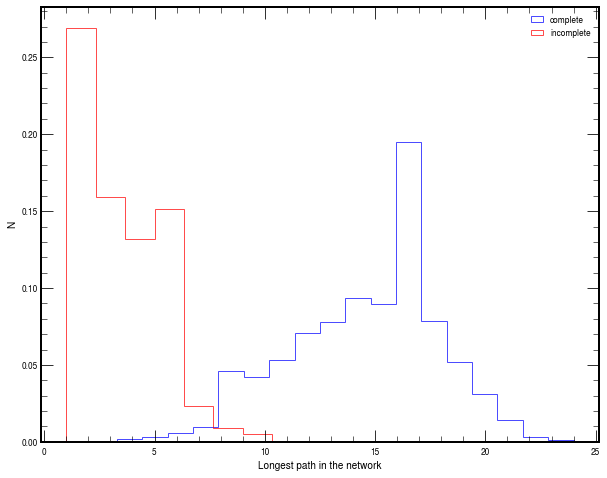

In [89]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.hist(path1_com, density=True, histtype='step', bins=20, color='b', alpha=0.7, label='complete')
plt.hist(path1_inc, density=True, histtype='step', bins=9, color='r', alpha=0.7, label='incomplete')
plt.legend()
plt.ylabel("N")
plt.xlabel("Longest path in the network")
plt.show()

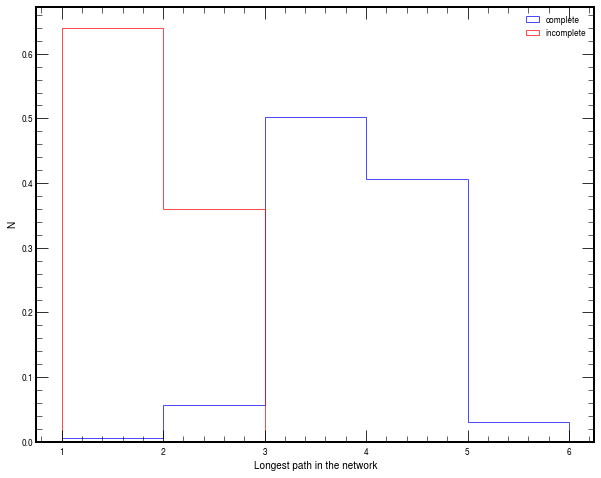

In [91]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.hist(path5_com, density=True, histtype='step', bins=5, color='b', alpha=0.7, label='complete')
plt.hist(path5_inc, density=True, histtype='step', bins=2, color='r', alpha=0.7, label='incomplete')
plt.legend()
plt.ylabel("N")
plt.xlabel("Longest path in the network")
plt.show()

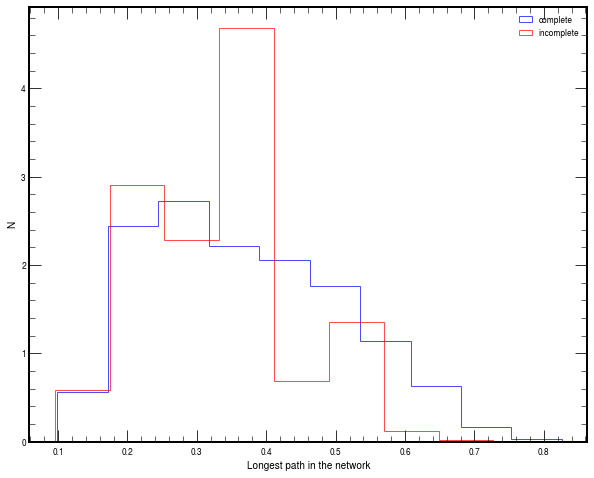

In [92]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.hist(path1_com_norm, density=True, histtype='step', bins=10, color='b', alpha=0.7, label='complete')
plt.hist(path1_inc_norm, density=True, histtype='step', bins=8, color='r', alpha=0.7, label='incomplete')
plt.legend()
plt.ylabel("N")
plt.xlabel("Longest path in the network")
plt.show()

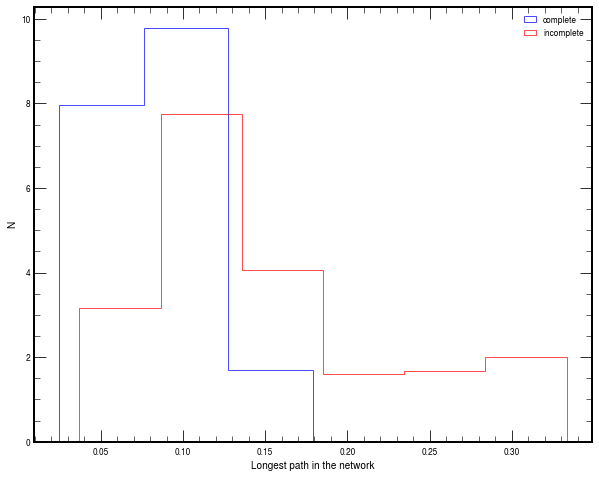

In [94]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.hist(path5_com_norm, density=True, histtype='step', bins=6, color='b', alpha=0.7, label='complete')
plt.hist(path5_inc_norm, density=True, histtype='step', bins=6, color='r', alpha=0.7, label='incomplete')
plt.legend()
plt.ylabel("N")
plt.xlabel("Longest path in the network")
plt.show()